# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: Multilayer ANNs
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202201

In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

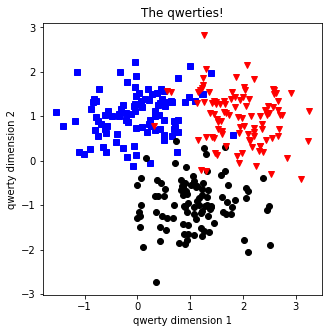

In [6]:
# create data

nPerClust = 100
blur = 0.6

A = [  0, 1 ]
B = [  1, -1 ]
C = [  2, 1 ]

# generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack(
    (
        np.zeros((nPerClust, 1)),
        np.ones((nPerClust,1)),
        np.ones((nPerClust,1))*2
    )
)

# concatanate into a matrix
data_np = np.hstack((a, b, c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np[:, 0]).long()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0], 1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0], 1],'ko')
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0], 1],'rv')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [7]:
labels.shape

torch.Size([300])

# Functions to build and train the model

In [8]:
learningRate = 0.01
# model architecture
ANNclassify = nn.Sequential(
    nn.Linear(2,4),   # output unit
    nn.ReLU(),   # output unit
    nn.Linear(4,3),   # output unit
  )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [9]:
def compute_accuracy(yHat, labels):
  matches = torch.argmax(yHat,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100 
  return accuracyPct


# a fixed parameter
numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)

ongoingAcc = []
c_acc = []
o_acc = []
v_acc = []

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  ongoingAcc.append( compute_accuracy(yHat, labels) )              # add to list of accuracies
  c_acc.append( compute_accuracy(yHat[labels == 0], labels[labels == 0]) )              # add to list of accuracies
  o_acc.append( compute_accuracy(yHat[labels == 1], labels[labels == 1]) )              # add to list of accuracies
  v_acc.append( compute_accuracy(yHat[labels == 2], labels[labels == 2]) )              # add to list of accuracies


# final forward pass
predictions = ANNclassify(data)
  
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Final accuracy: 93%
Final setosa accuracy: 89%
Final virginica accuracy: 95%
Final versicolor accuracy: 95%


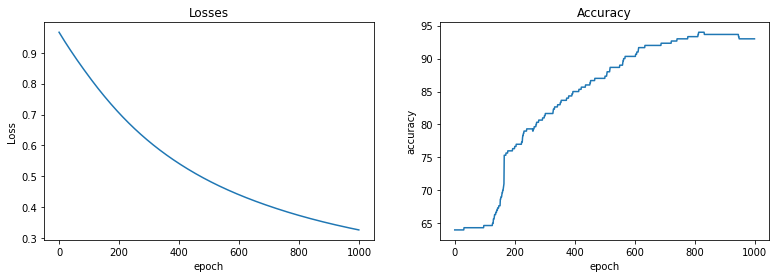

In [10]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)
print('Final setosa accuracy: %g%%' %c_acc[-1])
print('Final virginica accuracy: %g%%' %o_acc[-1])
print('Final versicolor accuracy: %g%%' %v_acc[-1])

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent